In [257]:
import numpy.random as R
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import json

(shape, scale): (2.5, 5)
mean:  4.444152302007246
median:  4.3476876455805975


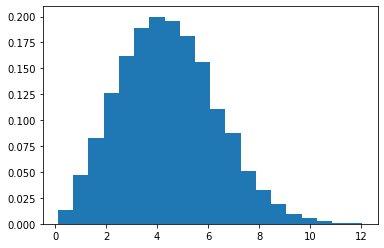

In [258]:
# shape parameter
alpha = 2.5

# scale parameter
beta = 5

# draw from unscaled Weibull distribution with shape alpha
samples = R.weibull(alpha, 10000)

# scale the distribution by beta
samples = np.multiply(samples, beta)

# view measures of center and histogram
print("(shape, scale): (%s, %s)" % (alpha, beta))
print("mean: ", np.mean(samples))
print("median: ", np.median(samples))
plt.hist(samples, 20, density=True)
plt.show()

In [259]:
def weibull(x, alpha, beta):
     return (alpha / beta) * (x / beta)**(alpha - 1) * np.exp(-(x / beta)**alpha)

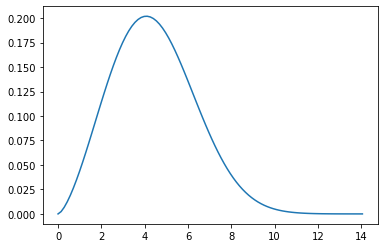

In [260]:
# visualize density

x = np.linspace(0,np.max(samples)+2, 100)
plt.plot(x, weibull(x, alpha, beta))
plt.show()

In [261]:
# test box

# a = [1, 2, 3]
# np.multiply(a, 3)

In [262]:
# functions for tuning Weibull distribution parameters to yield a given mean

def weibullMeans(alphaRange, betaRange):
    '''
    computes expected value for each pair of 
    (alpha, beta) in the cross-product of arrays alphaRange and betaRange
    '''
    results = []
    for alpha in alphaRange:
        for beta in betaRange:
            samples = R.weibull(alpha, 10000)
            samples = np.multiply(samples, beta)
            mu = np.mean(samples)
            results.append(((alpha, beta), mu))
    return results

def filterMeans(means, target, margin):
    out = []
    for mean in means:
        if abs(mean[1] - target) < margin:
            out.append(mean)
    return out

def getClosest(means, target):
    minErr = 100
    out = ()
    for mean in means:
        err = abs(mean[1] - target)
        if err < minErr:
            minErr = err
            out = mean
    return out

def tuneParams(target):
    alphaRange = np.linspace(1,4,50)
    betaRange = np.linspace(3,12,50)
    
    unfiltered = weibullMeans(alphaRange, betaRange)
    params = getClosest(unfiltered, target)
    
    return params

def tuneToTargets(targets):
    out = []
    for target in targets:
        tuned = tuneParams(target)
        r = {
            "target": target,
            "approx": tuned[1],
            "error": abs(target-tuned[1]),
            "alpha": tuned[0][0],
            "beta": tuned[0][1]
        }
        out.append(r)
    return out

In [263]:
# tune a Weibull distribution for each target mean

targets = [4.6, 4, 8, 6, 10]
tunedParams = tuneToTargets(targets)

In [264]:
# look at those beautifully tuned parameters

# HERE! annotate this, make it look nicer, so I know what I'm actually approximating here

print(json.dumps(tunedParams, indent=4))

[
    {
        "target": 4.6,
        "approx": 4.600736169281088,
        "error": 0.0007361692810885501,
        "alpha": 2.2857142857142856,
        "beta": 5.204081632653061
    },
    {
        "target": 4,
        "approx": 3.9998167734633556,
        "error": 0.00018322653664437638,
        "alpha": 2.5306122448979593,
        "beta": 4.469387755102041
    },
    {
        "target": 8,
        "approx": 8.002449220792444,
        "error": 0.002449220792444251,
        "alpha": 3.4489795918367347,
        "beta": 8.877551020408163
    },
    {
        "target": 6,
        "approx": 5.996932226736636,
        "error": 0.0030677732633641597,
        "alpha": 3.63265306122449,
        "beta": 6.673469387755102
    },
    {
        "target": 10,
        "approx": 10.00049686363937,
        "error": 0.0004968636393698489,
        "alpha": 1.9795918367346939,
        "beta": 11.26530612244898
    }
]


In [265]:
# space
'''
incubation period -> mu = 4.6 days -> Weibull(2.29,5.20)
infectious period / onset to hospitalization -> mu = 4 days -> Weibull(2.53,4.47)
length of hospital stay no critical care -> mu = 8 days -> Weibull(3.45,8.88)
length of hospital stay leading to critical care -> mu = 6 days -> Weibull(3.63,6.67)
length of critical care -> mu = 10 days -> Weibull(1.98,11.27)
'''

In [282]:
# function for estimating pr, ph, pc

def drawStrataFreqs(n):
    colM, colS, colC = [], [], []
    for _ in range(n):
    
        # draw from each very rough prior
        mild = R.triangular(75,80,85)
        severe = R.triangular(12,13.8,15)
        critical = R.triangular(3,4.7,6)

        # compute relative frequencies
        total = mild + severe + critical

        m = mild / total
        s = severe / total
        c = critical / total
        
        colM.append(m)
        colS.append(s)
        colC.append(c)
    return pd.DataFrame({"mild": colM, "severe": colS, "critical": colC})

In [283]:
df = drawStrataFreqs(10000)

In [284]:
df.mean()

mild        0.814913
severe      0.138565
critical    0.046522
dtype: float64

In [285]:
print("it's monte carlo time")

it's monte carlo time
